#### Step 0: Download data ['Male and female faces dataset'](https://www.kaggle.com/ashwingupta3012/male-and-female-faces-dataset)

In [49]:
import os
import hashlib
import cv2
import random
import pandas as pd

#### Step 1: Calculate the md5 value of images and drop the same images.

In [4]:
def md5sum(filename):
    f = open(filename, 'rb')
    md5 = hashlib.md5()
    while True:
        fb = f.read(8096)
        if not fb:
            break
        md5.update(fb)
    f.close()
    return (md5.hexdigest())
 

def delfile(path):
    all_md5 = {}
    filedir = os.walk(path)
    for i in filedir:
        tem_str = i[0]
        print('Before drop duplicates, we have :',len(i[2]),'image')
        for tlie in i[2]:
            tlie = tem_str +'\\'+tlie
            if md5sum(tlie) in all_md5.values():
                #show the same images
                '''
                another_tlie = list(all_md5.keys())[list(all_md5.values()).index(md5sum(tlie))]
                image = Image.open(tlie)
                another = Image.open(another_tlie)
                showed_original = [np.array(image), np.array(another)]
                fig = plt.figure()
                for i in range(2):
                    plt.subplot(1, 2, i+1)
                    plt.imshow(showed_original[i]/255)
                plt.show()
                print(tlie,'has the same md5 with',another_tlie)
                '''
                os.remove(tlie)
            else:
                all_md5[tlie] = md5sum(tlie)
    filedir = os.walk(path)
    for i in filedir:
        print('After drop duplicates, we have :',len(i[2]),'image')


md5 of image 1: cda834529d1505ebce1ba6dfed2931cc
md5 of image 2: cda834529d1505ebce1ba6dfed2931cc


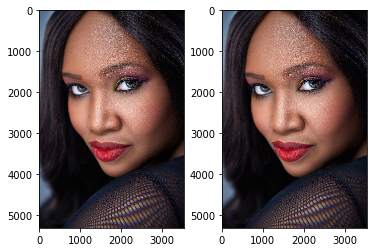

In [59]:
# An example of the similar images.
image1 = '0 (2).jpeg'
image2 = '0 (15).jpeg'
print('md5 of image 1:',md5sum(image1))
print('md5 of image 2:',md5sum(image1))
showed_original = [np.array(Image.open(image1)), np.array(Image.open(image2))]
fig = plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_original[i]/255)
plt.show()

In [5]:
#calculate the md5 value of images and drop the same images
path = os.getcwd()+'\\test'
delfile(path)

Before drop duplicates, we have : 966 image
After drop duplicates, we have : 966


#### Step 2: Calculate the Mean Hash distance of images and drop the similar images.

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def mean_hash(image):
    """
    https://zhuanlan.zhihu.com/p/85459084
    Mean Hash , return a 8x8 vector with 0 or 1
    Args:
        image:image that want be converted, with PIL Image type
    Returns:
        numpy vector with hash code
    """
    # step1：resize and gray scale image
    image_resized = image.convert("L").resize((resize_n,resize_n), Image.ANTIALIAS)
    image_numpy = np.array(image_resized)
    
    # step2：compute mean gray value
    mean_value = np.mean(image_numpy)
    
    # create empty list to store hanming code
    hash_code = []
    # step：3
    # Traversal every pixel and compare it with mean gray value
    for i in range(image_numpy.shape[0]):
        for j in range(image_numpy.shape[1]):
            if image_numpy[i, j] > mean_value:
                hash_code.append(1)
            elif image_numpy[i, j] <=  mean_value:
                hash_code.append(0)
    return hash_code
    
def hanming(image_code, ref_code):
    """
    calculate hanming distance between image and reference
    Args:
        image_code: list type
        ref_code: list type
    """
    assert len(image_code)== len(ref_code)
    return sum(abs(np.array(image_code)-np.array(ref_code)))/len(image_code)
    

md5 of image 1: b2e89c1e0dfcabb7928b559c67491a32
md5 of image 2: 71d25ed7d45868b9e4f4a3f49a0aef90
<class 'list'>


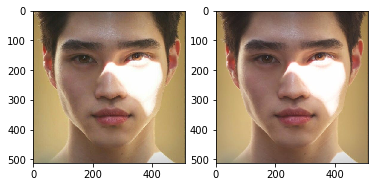

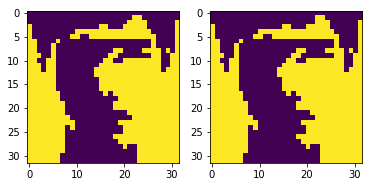

0.0009765625


In [64]:
# An example of the similar images.
print('md5 of image 1:',md5sum("512_512_9949.jpg"))
print('md5 of image 2:',md5sum("512_512.jpg"))

resize_n =32
image = Image.open("512_512_9949.jpg")
image_code = mean_hash(image)
print(type(image_code))
ref = Image.open("512_512.jpg")
ref_code = mean_hash(ref)

distance = hanming(image_code, ref_code) 
showed_original = [np.array(image), np.array(ref)]
showed_hash = [np.array(image_code).reshape(resize_n, resize_n), np.array(ref_code).reshape(resize_n, resize_n)]
# plot image and ref
fig = plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_original[i]/255)
plt.show()

# plot image_code and ref_code
plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_hash[i]/255)
plt.show()
print(distance)

In [52]:
resize_n = 32

df = pd.DataFrame(columns=['tile','code'])

path = os.getcwd()+'\\test'
filedir = os.walk(path)
tem_str = ''
for i in filedir:
    tem_str = i[0]
    df['tile'] = i[2]
df['code'] = df['tile'].apply(lambda x: mean_hash(Image.open(tem_str + '\\' + x)))

In [54]:
drop_list = []
for index1 in df.index:
    code1 = df.loc[index1,'code']
    for index2 in df.index:
        if index2==index1:
            continue
        else:
            code2 = df.loc[index2,'code']
            distance = hanming(code1, code2)
            if distance<=0.005:
                #show the similar images
                '''
                image1 = Image.open(tem_str +'\\' + df.loc[index1,'tile'])
                image2 = Image.open(tem_str +'\\' + df.loc[index2,'tile'])
                showed_original = [np.array(image1), np.array(image2)]
                fig = plt.figure()
                for i in range(2):
                    plt.subplot(1, 2, i+1)
                    plt.imshow(showed_original[i]/255)
                plt.show()
                print(df.loc[index1,'tile'],df.loc[index2,'tile'])
                '''
                df.drop(index1,axis=0)
                drop_list.append(df.loc[index1,'tile'])
                break

In [56]:
len(drop_list)

281

In [63]:
for tlie in drop_list:
    tlie = tem_str +'\\'+tlie
    os.remove(tlie)
filedir = os.walk(path)
for i in filedir:
    print('After drop similar images, we have :',len(i[2]))

FileNotFoundError: [WinError 2] 系统找不到指定的文件。: 'C:\\Users\\15372\\Desktop\\Gropu_Project\\new_data\\test\\1 (1).jpeg'